

> Indented block



*   Name: Rishabh Patil
*   SAP: 60009200056
*   DIV: K/K2



In [ ]:
import numpy as np;
import pandas as pd;
df=pd.read_csv("daily-total-female-births-CA-with_nulls.csv",header=0, index_col=0)

In [ ]:

print(df.head(10))

            births
date              
1959-01-01    35.0
1959-01-02    32.0
1959-01-03    30.0
1959-01-04    31.0
1959-01-05    44.0
1959-01-06    29.0
1959-01-07    45.0
1959-01-08     NaN
1959-01-09    38.0
1959-01-10    27.0


In [ ]:
#checking for null values
print(df.isnull().sum())

births    16
dtype: int64


In [ ]:
print(df.describe().T)

        count       mean       std   min   25%   50%   75%   max
births  349.0  42.048711  7.395667  23.0  37.0  42.0  46.0  73.0


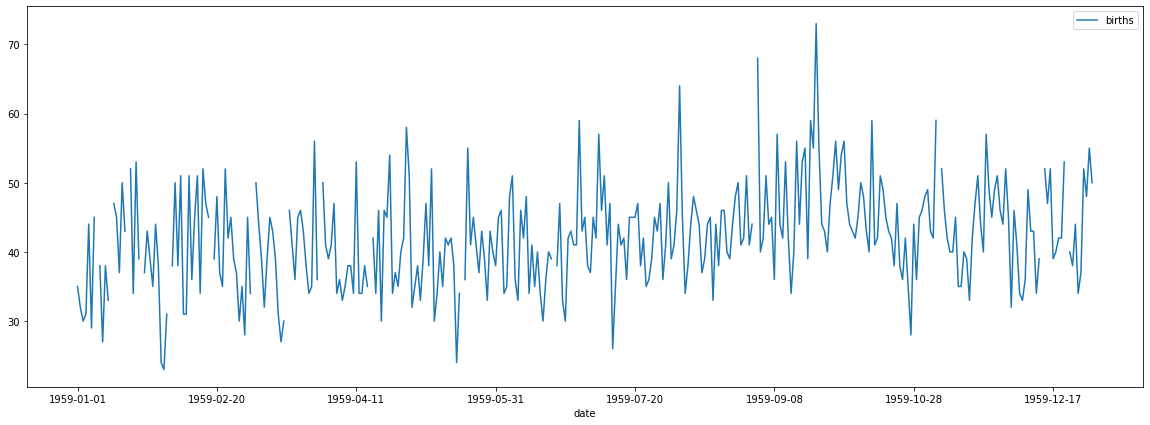

In [ ]:
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"]=(20,7)
df.plot()

In [ ]:
d1=pd.read_csv("daily-total-female-births-CA-with_nulls.csv",header=0, index_col=0)
d1=d1.bfill()
print(d1.describe().T)

        count       mean       std   min   25%   50%   75%   max
births  365.0  42.191781  7.465778  23.0  37.0  42.0  46.0  73.0


In [ ]:
d1=pd.read_csv("daily-total-female-births-CA-with_nulls.csv",header=0, index_col=0)
d1=d1.ffill()
print(d1.describe().T)

        count       mean       std   min   25%   50%   75%   max
births  365.0  41.956164  7.422363  23.0  36.0  42.0  46.0  73.0


Interpolate

In [ ]:
d2=d1.interpolate(method='linear',limit_direction='forward')
print(d2.describe().T)

        count       mean       std   min   25%   50%   75%   max
births  365.0  41.956164  7.422363  23.0  36.0  42.0  46.0  73.0


**using pandasql**

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=3f01bb087a4d5da98748927fc5540131c69ef7b5ff125a922eab087c81b15e42
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
from pandasql import sqldf

In [ ]:
df=pd.read_csv('/content/Smart_City_index_headers.csv')
df.describe()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,29.588849,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,1.000000,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,26.250000,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,51.500000,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,76.750000,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,102.000000,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


In [ ]:
df.isna().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

Displaying top 5 records

In [ ]:
Query_string = """ select * from df limit 5 """
sqldf(Query_string, globals())

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [ ]:
df.rename(columns={'Smart_Mobility ': 'Smart_Mobility', 'Smart_Government ':'Smart_Government', 'Smart_Economy ':'Smart_Economy'}, inplace=True)

Applying a filter

In [ ]:
Query_string = """ select * from df where Smart_Mobility>=4500 and Smart_Mobility<=5500 """
sqldf(Query_string, globals())

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,13,Västerås,Sweden,4683,8296,7840,5980,7065,7730,6771,299
1,17,Stavanger,Norway,5317,7162,6600,5360,7595,9090,6818,346
2,25,Taipei,Taiwan,4978,4366,7044,3310,7858,7350,5755,-718
3,29,Helsingborg,Sweden,4578,8312,7396,6245,4590,7730,6393,-79
4,33,Geneva,Switzerland,4870,8706,5326,6150,5650,7960,6431,-41
5,36,Turku,Finland,4530,6504,5986,8100,7050,8710,6676,204
6,37,Espoo,Finland,5342,6458,6256,7950,6503,8710,6804,332
7,41,Joensuu,Finland,5045,6730,6356,8325,5463,8710,6703,230
8,43,Frankfurt am Main,Germany,5487,7650,6196,7600,4868,5690,6185,-288
9,45,Oulu,Finland,5258,6488,5642,8135,7105,8710,6816,344


Displaying unique IDs

In [ ]:
Query_string = """ select distinct Id from df;"""
sqldf(Query_string, globals())

,Id
0,1
1,2
2,3
3,4
4,5
...,...
97,98
98,99
99,100
100,101


Ascending Data order

In [ ]:
Query_string = """ select * from df order by Smart_People;"""
sqldf(Query_string, globals())

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,89,Ancona,Italy,4208,7496,5826,7910,2825,3950,5241,-1232
1,77,Bayreuth,Germany,3932,7696,5630,6395,3108,5690,5339,-1133
2,94,Kuala Lampur,Malaysia,4347,2076,5890,2720,3313,8790,4652,-1820
3,59,Osaka,Japan,7233,4758,5732,2105,3403,9320,5795,-678
4,60,Bordeaux,France,5550,7586,6832,7720,3425,6750,6296,-176
...,...,...,...,...,...,...,...,...,...,...,...
97,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353,880
98,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771,298
99,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
100,63,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,5314,-1158


Descending Data order

In [ ]:
Query_string = """ select * from df order by Smart_Government Desc;"""
sqldf(Query_string, globals())

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
1,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
2,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
3,34,Luxembourg,Luxembourg,3747,7090,8254,8440,4723,6820,6255,-217
4,13,Västerås,Sweden,4683,8296,7840,5980,7065,7730,6771,299
...,...,...,...,...,...,...,...,...,...,...,...
97,96,Naples,Italy,3175,6802,4008,5640,4618,3950,4566,-1906
98,93,Shanghai,China,6870,2936,3842,4430,4423,1980,4228,-2244
99,80,Birmingham,United Kingdom,6383,7102,3644,7400,4548,4550,5689,-783
100,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281


Aggregation

In [ ]:
Query_string = """ select count(Smart_Economy) as count, min(Smart_Economy) as min, max(Smart_Economy) as max, avg(Smart_Economy) as mean from df;"""
sqldf(Query_string, globals())

,count,min,max,mean
0,102,1490,9225,6131.803922


Group by

In [ ]:
Query_string = """ select Id, sum(Smart_Economy) as Sum_Smart_Economy from df group by Id;"""
sqldf(Query_string, globals())

,Id,Sum_Smart_Economy
0,1,4565
1,2,4905
2,3,8095
3,4,5580
4,5,4330
...,...,...
97,98,7380
98,99,4905
99,100,4515
100,101,8022
